In [1]:
import sys
sys.path.append("..")
import pandas as pd
from layzee.dataframe_observer import *
from layzee.feature_handling import *
from layzee.feature_reduction import *

## DF Summary

In [2]:
df = pd.read_csv('../data/california_train.csv')
df_info = read_df_info(df, return_result=True)

------------------
1460 rows, 81 columns.
------------------
                 dtype  unique   unique%  missing  missing%
Id               int64    1460  1.000000        0  0.000000
MSSubClass       int64      15  0.010274        0  0.000000
MSZoning        object       5  0.003425        0  0.000000
LotFrontage    float64     110  0.075342      259  0.177397
LotArea          int64    1073  0.734932        0  0.000000
Street          object       2  0.001370        0  0.000000
Alley           object       2  0.001370     1369  0.937671
LotShape        object       4  0.002740        0  0.000000
LandContour     object       4  0.002740        0  0.000000
Utilities       object       2  0.001370        0  0.000000
LotConfig       object       5  0.003425        0  0.000000
LandSlope       object       3  0.002055        0  0.000000
Neighborhood    object      25  0.017123        0  0.000000
Condition1      object       9  0.006164        0  0.000000
Condition2      object       8  0.00547

In [3]:
writer = pd.ExcelWriter("report.xlsx")
df_info.to_excel(writer, sheet_name="df_info")

In [4]:
target_col = 'SalePrice'
target_col_is_num = df[target_col].dtype != 'object'
id_cols = df_info[df_info['unique%']==1].index.tolist()
cat_cols = df.select_dtypes('object').columns.tolist()
num_cols = df.select_dtypes('number').columns.tolist()
cat_cols = set(cat_cols) - set(id_cols) - set(target_col)
num_cols = set(num_cols) - set(id_cols) - set(target_col)

## Cat col stats

-------------------------------------
Name: GarageQual
Type: object
Rows: 1460
Distinct: 5
Mode: TA
Missing: 81
Missing%: 0.05547945205479452
-------------------------------------
Top 5 values:
  GarageQual  Count         %     Cum.%
0         TA   1311  0.950689  0.950689
1         Fa     48  0.034808  0.985497
2         Gd     14  0.010152  0.995649
3         Po      3  0.002175  0.997825
4         Ex      3  0.002175  1.000000
-------------------------------------
-------------------------------------
Name: LotConfig
Type: object
Rows: 1460
Distinct: 5
Mode: Inside
Missing: 0
Missing%: 0.0
-------------------------------------
Top 5 values:
  LotConfig  Count         %     Cum.%
0    Inside   1052  0.720548  0.720548
1    Corner    263  0.180137  0.900685
2   CulDSac     94  0.064384  0.965068
3       FR2     47  0.032192  0.997260
4       FR3      4  0.002740  1.000000
-------------------------------------
-------------------------------------
Name: CentralAir
Type: object
Rows: 14

/Users/FY/Desktop/workspaceMac/Layzee/layzee/dataframe_observer.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


-------------------------------------
Name: Utilities
Type: object
Rows: 1460
Distinct: 2
Mode: AllPub
Missing: 0
Missing%: 0.0
-------------------------------------
Top 2 values:
  Utilities  Count         %     Cum.%
0    AllPub   1459  0.999315  0.999315
1    NoSeWa      1  0.000685  1.000000
-------------------------------------
-------------------------------------
Name: GarageCond
Type: object
Rows: 1460
Distinct: 5
Mode: TA
Missing: 81
Missing%: 0.05547945205479452
-------------------------------------
Top 5 values:
  GarageCond  Count         %     Cum.%
0         TA   1326  0.961566  0.961566
1         Fa     35  0.025381  0.986947
2         Gd      9  0.006526  0.993474
3         Po      7  0.005076  0.998550
4         Ex      2  0.001450  1.000000
-------------------------------------
-------------------------------------
Name: MiscFeature
Type: object
Rows: 1460
Distinct: 4
Mode: Shed
Missing: 1406
Missing%: 0.963013698630137
-------------------------------------
Top 4 valu

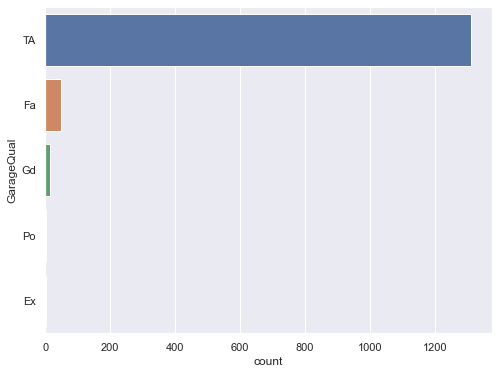

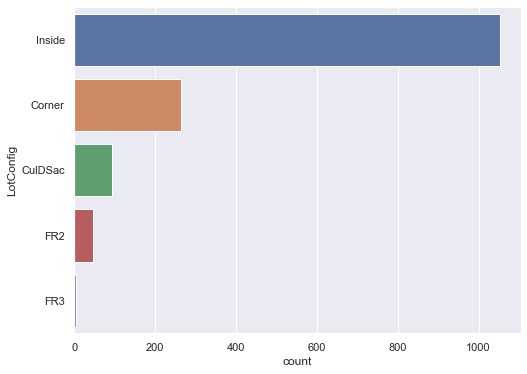

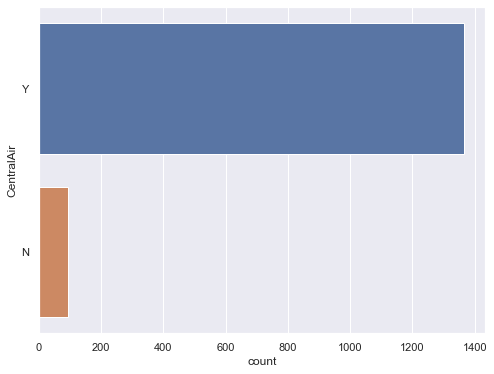

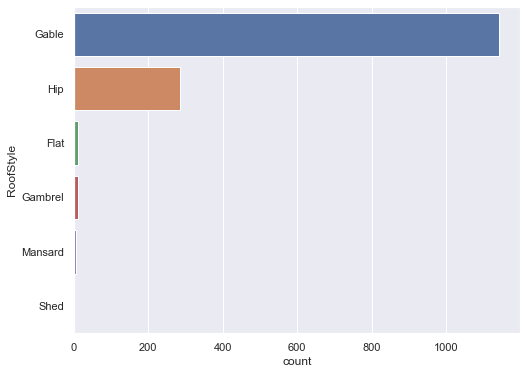

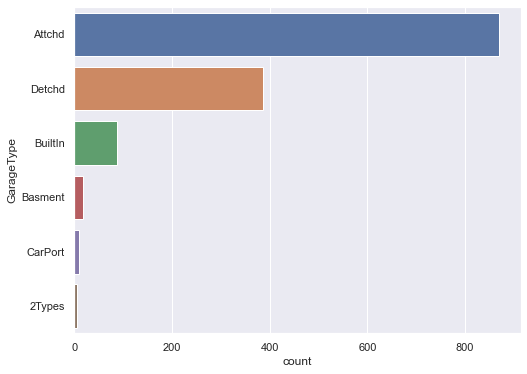

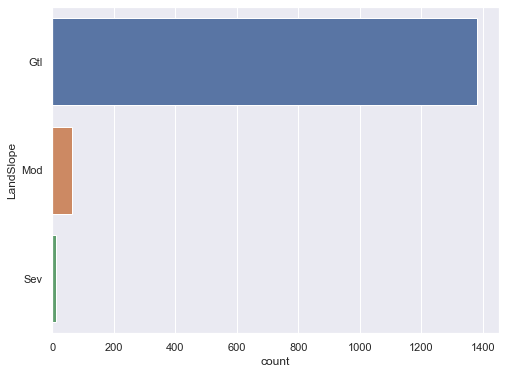

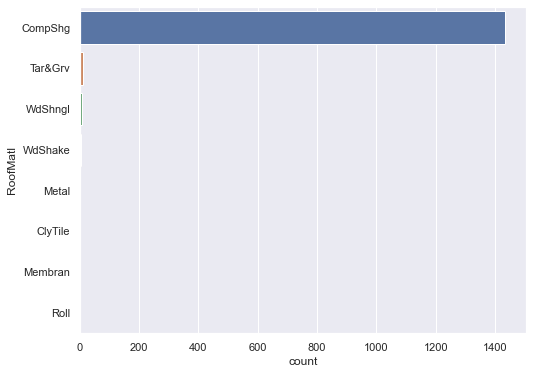

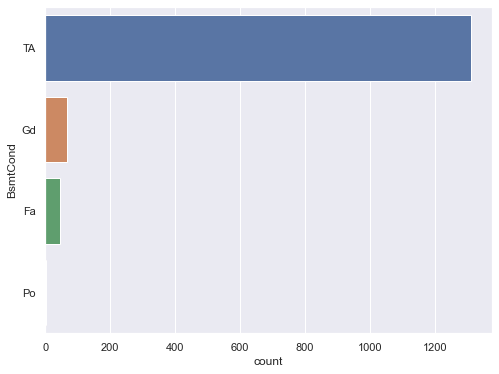

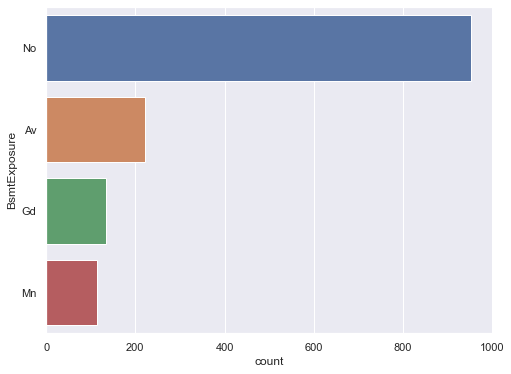

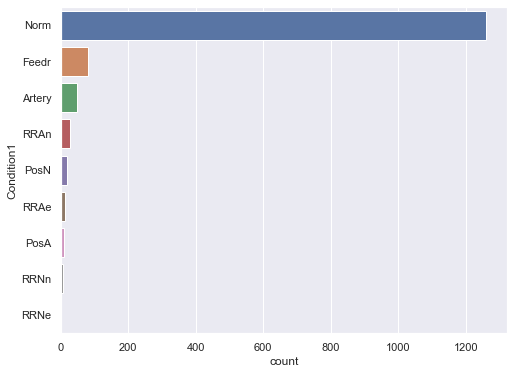

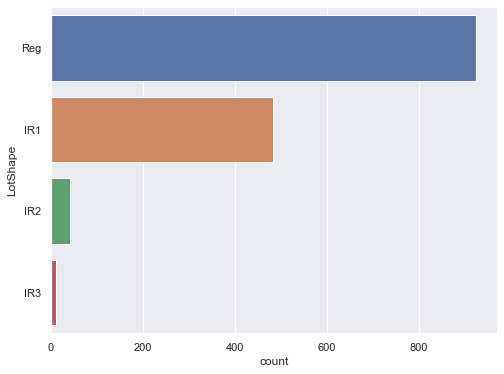

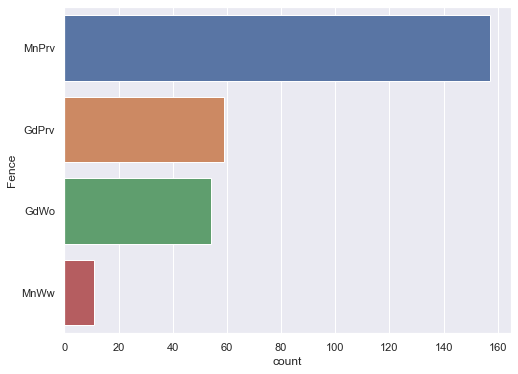

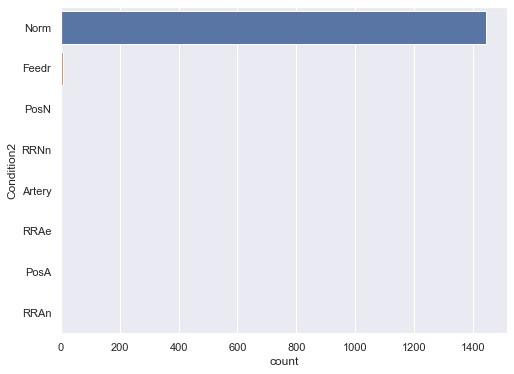

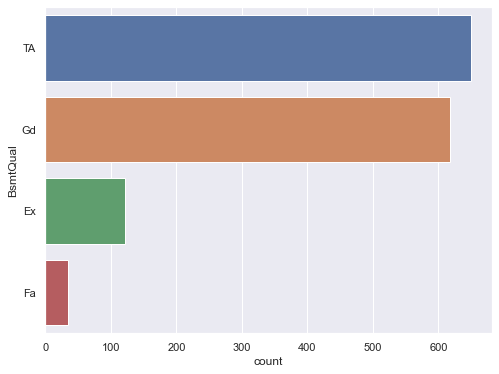

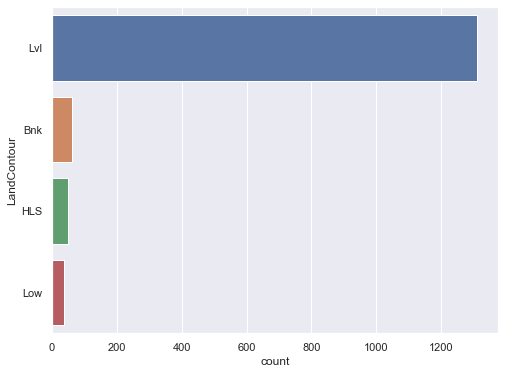

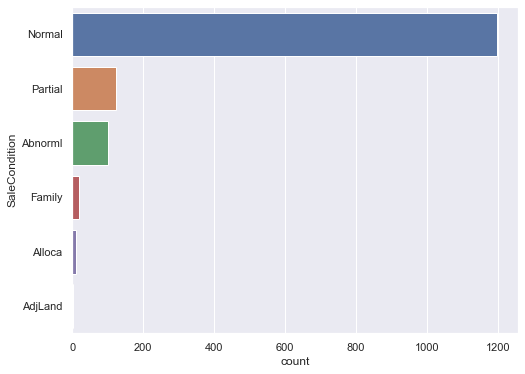

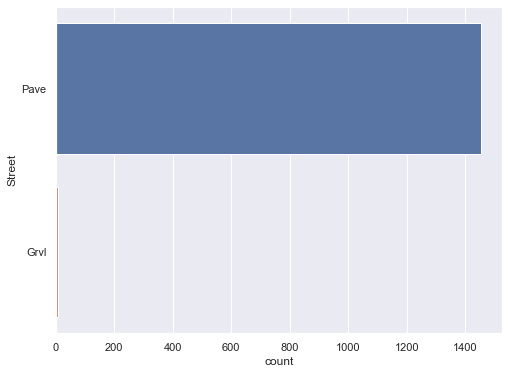

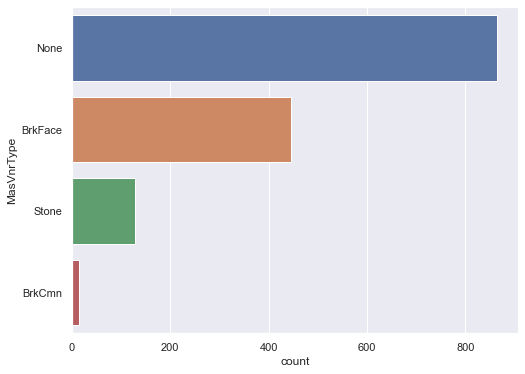

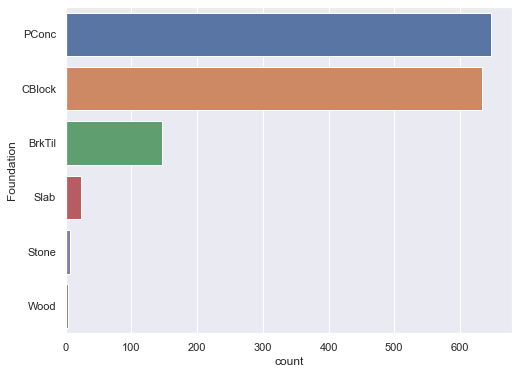

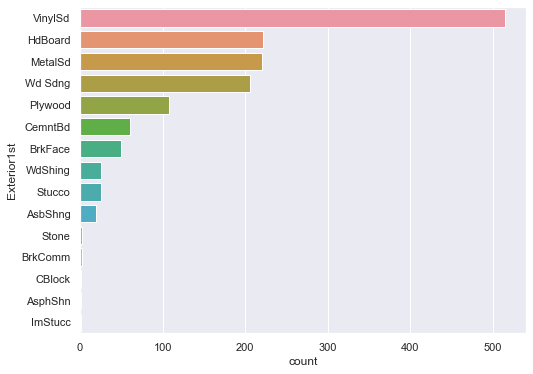

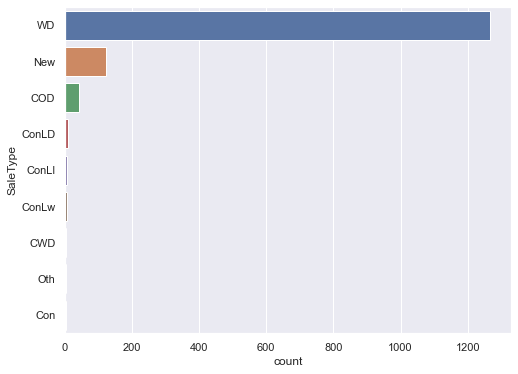

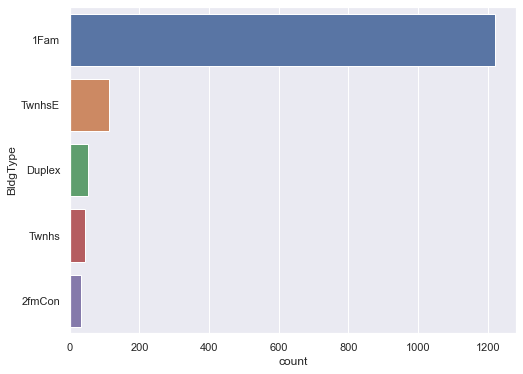

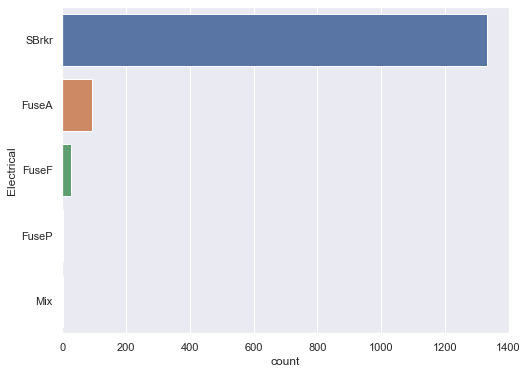

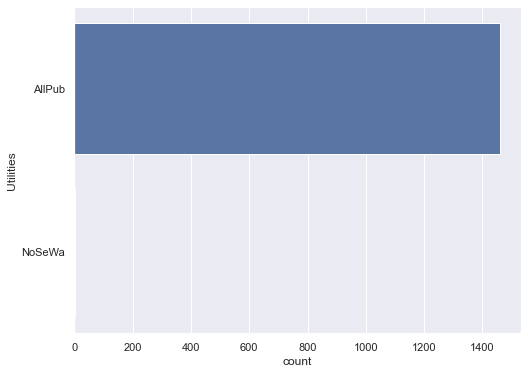

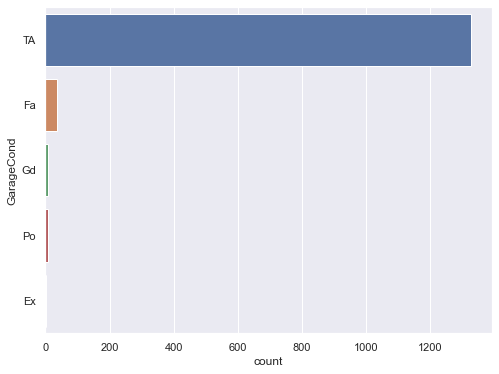

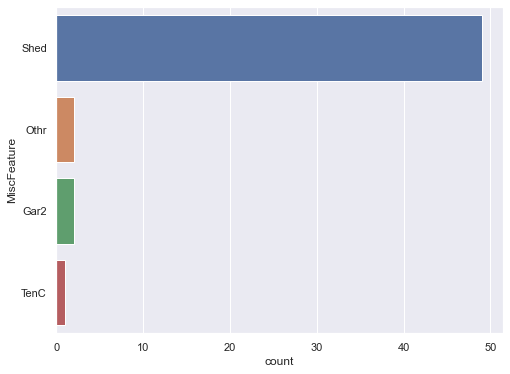

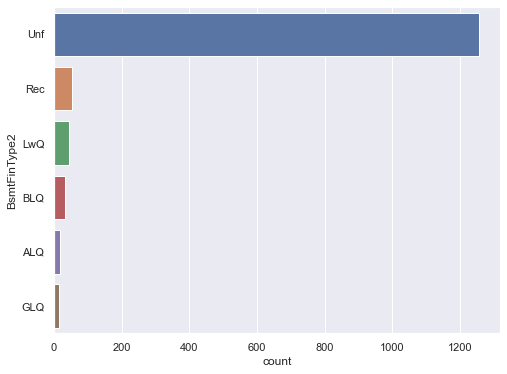

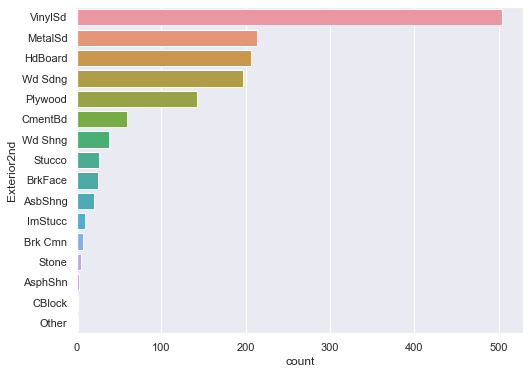

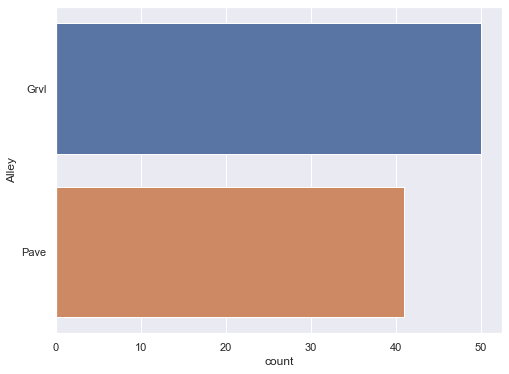

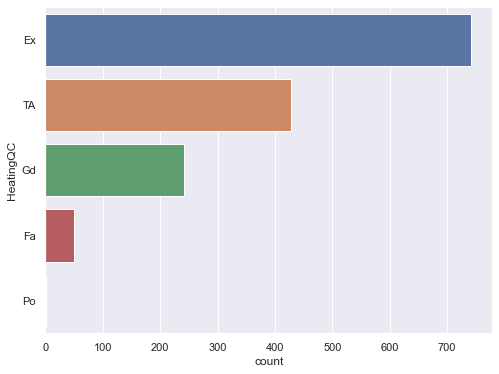

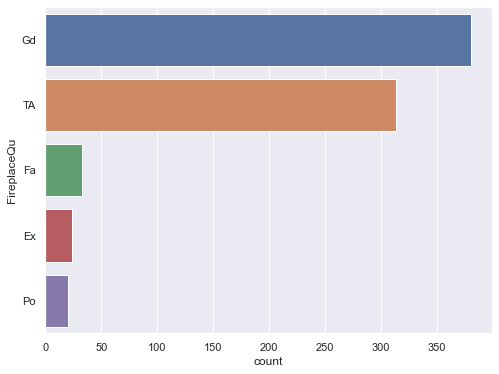

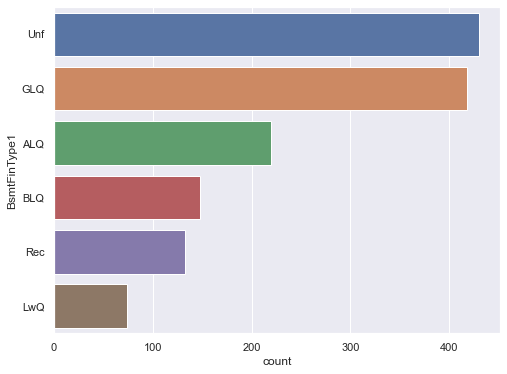

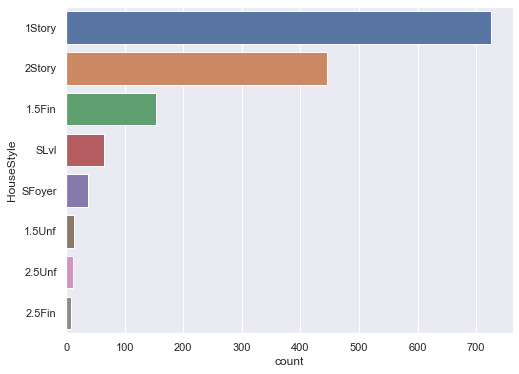

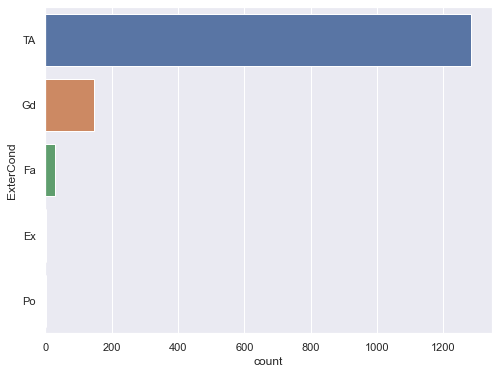

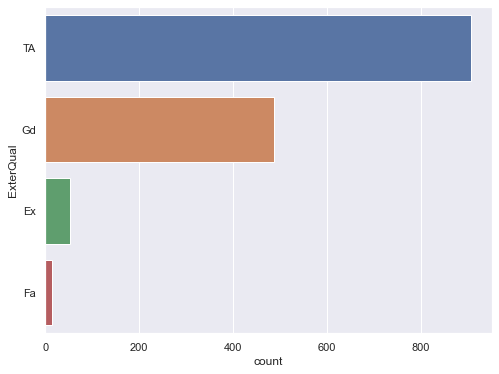

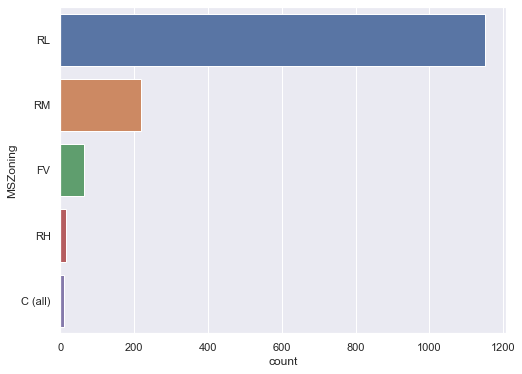

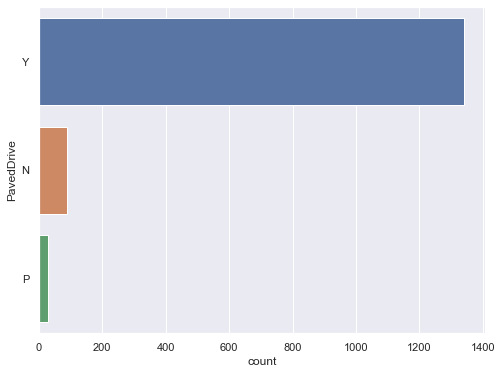

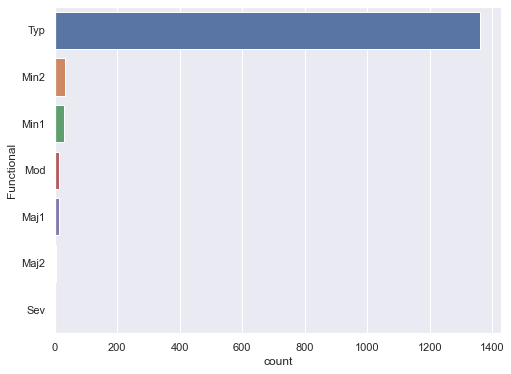

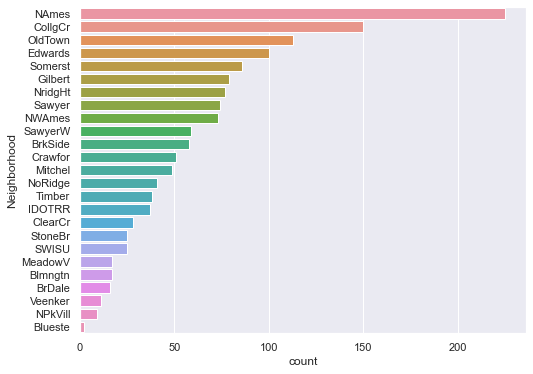

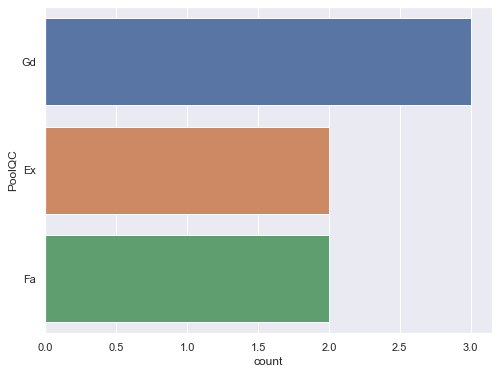

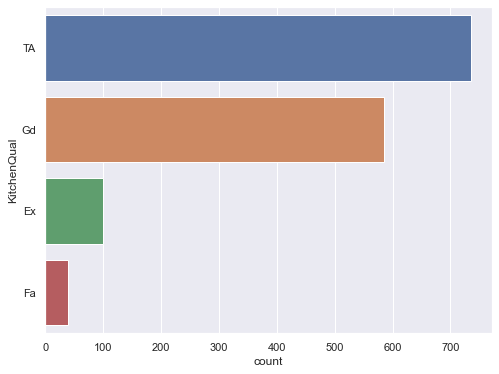

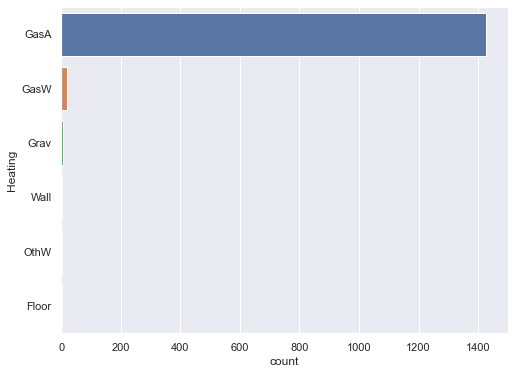

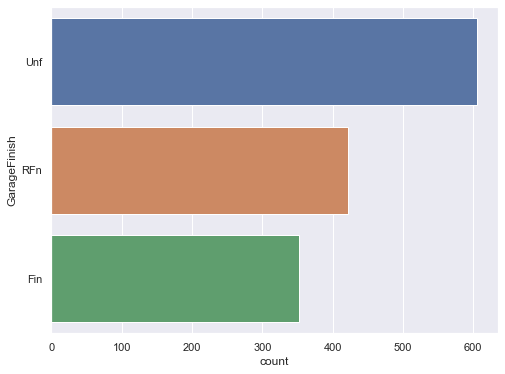

In [5]:
cat_col_stats = []
for col in cat_cols:
    stats,_ = describe_cat_col(df, col, return_result=True)
    cat_col_stats.append(stats)
cat_col_stats = pd.DataFrame(cat_col_stats)
cat_col_stats.set_index('Name', inplace=True)
cat_col_stats.to_excel(writer, sheet_name="cat_cols_stats")

## Num cal stats

-------------------------------------
Name: BsmtFinSF1
Type: int64
Rows: 1460
Min: 0
Max: 5644
Mean: 443.6397260273973
Median: 383.5
Mode: 0
StdDev: 456.0980908409277
Distinct: 637
Sum: 647714
Missing: 0
Missing%: 0.0
Skewness: 1.685503071910789
Kurtosis: 11.118236291964712
Outliers: 7
Outliers%: 0.004794520547945206
Q1: 0.0
Q3: 712.25
IQR: 712.25
Down: -1068.375
Up: 1780.625
-------------------------------------
Shapiro-Wilk statistic:  0.8479605913162231
Significance level: 0.05
p-value:  2.8140120808220724e-35
<BsmtFinSF1 is normally distributed> can be rejected.
-------------------------------------
-------------------------------------
Name: Fireplaces
Type: int64
Rows: 1460
Min: 0
Max: 3
Mean: 0.613013698630137
Median: 1.0
Mode: 0
StdDev: 0.6446663863122295
Distinct: 4
Sum: 895
Missing: 0
Missing%: 0.0
Skewness: 0.6495651830548841
Kurtosis: -0.21723720752814657
Outliers: 5
Outliers%: 0.003424657534246575
Q1: 0.0
Q3: 1.0
IQR: 1.0
Down: -1.5
Up: 2.5
--------------------------------

/Users/FY/Desktop/workspaceMac/Layzee/layzee/dataframe_observer.py:161: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


-------------------------------------
Name: FullBath
Type: int64
Rows: 1460
Min: 0
Max: 3
Mean: 1.5650684931506849
Median: 2.0
Mode: 2
StdDev: 0.5509158012954317
Distinct: 4
Sum: 2285
Missing: 0
Missing%: 0.0
Skewness: 0.036561558402727165
Kurtosis: -0.8570428212743262
Outliers: 0
Outliers%: 0.0
Q1: 1.0
Q3: 2.0
IQR: 1.0
Down: -0.5
Up: 3.5
-------------------------------------
Shapiro-Wilk statistic:  0.7193548679351807
Significance level: 0.05
p-value:  4.203895392974451e-44
<FullBath is normally distributed> can be rejected.
-------------------------------------
-------------------------------------
Name: HalfBath
Type: int64
Rows: 1460
Min: 0
Max: 2
Mean: 0.38287671232876713
Median: 0.0
Mode: 0
StdDev: 0.5028853810928914
Distinct: 3
Sum: 559
Missing: 0
Missing%: 0.0
Skewness: 0.675897448233722
Kurtosis: -1.0769272841476227
Outliers: 0
Outliers%: 0.0
Q1: 0.0
Q3: 1.0
IQR: 1.0
Down: -1.5
Up: 2.5
-------------------------------------
Shapiro-Wilk statistic:  0.6380077600479126
Significan

<Figure size 576x432 with 0 Axes>

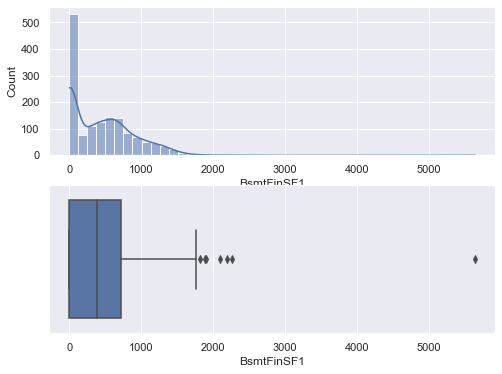

<Figure size 576x432 with 0 Axes>

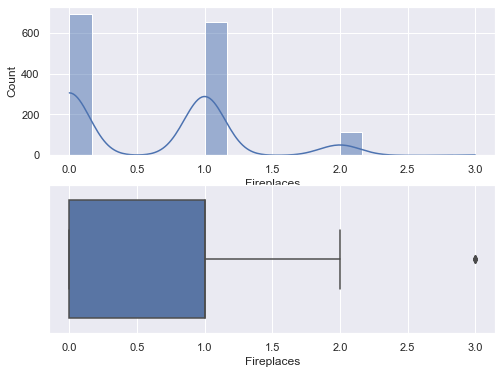

<Figure size 576x432 with 0 Axes>

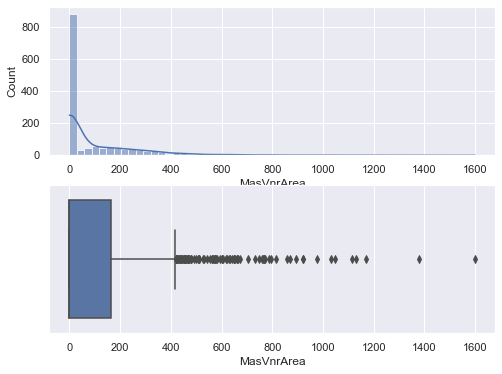

<Figure size 576x432 with 0 Axes>

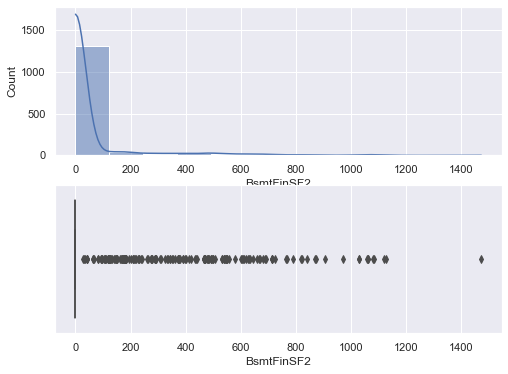

<Figure size 576x432 with 0 Axes>

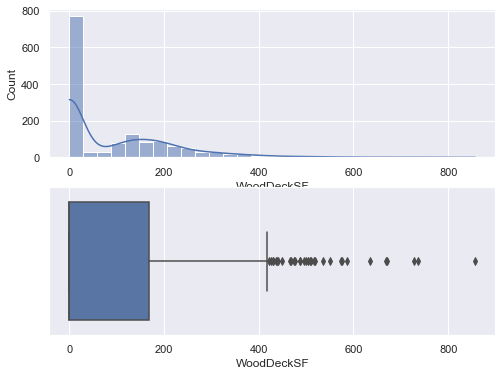

<Figure size 576x432 with 0 Axes>

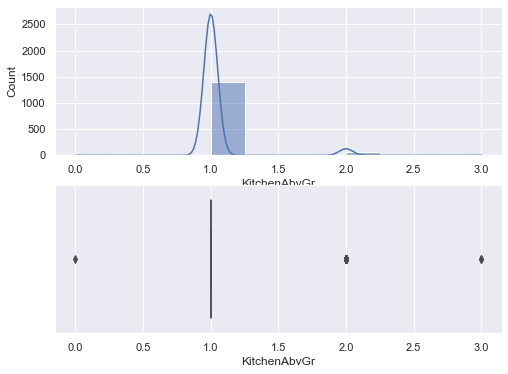

<Figure size 576x432 with 0 Axes>

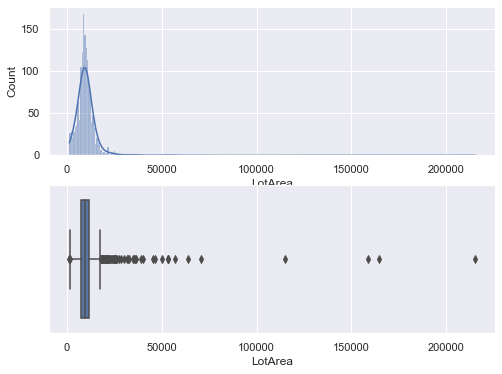

<Figure size 576x432 with 0 Axes>

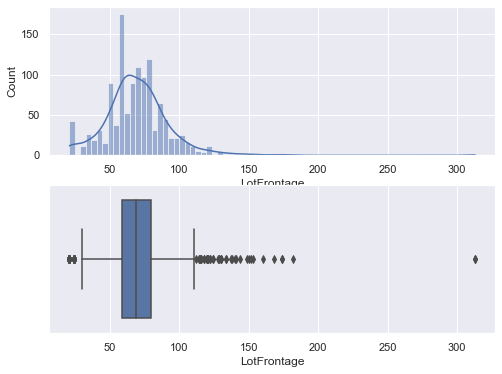

<Figure size 576x432 with 0 Axes>

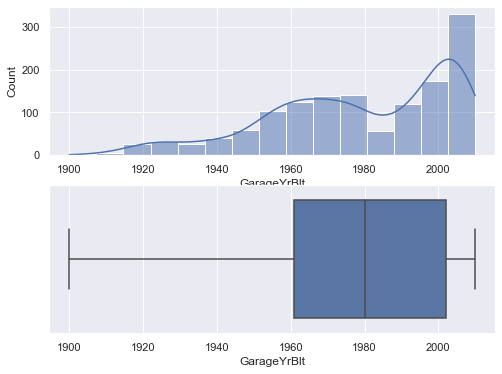

<Figure size 576x432 with 0 Axes>

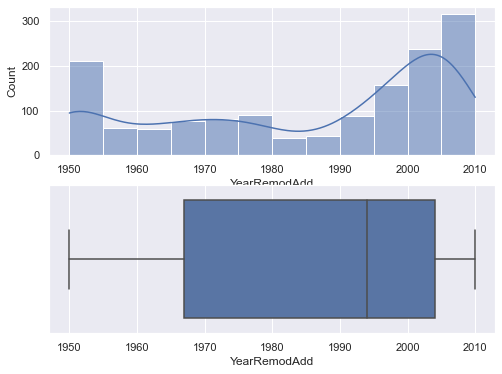

<Figure size 576x432 with 0 Axes>

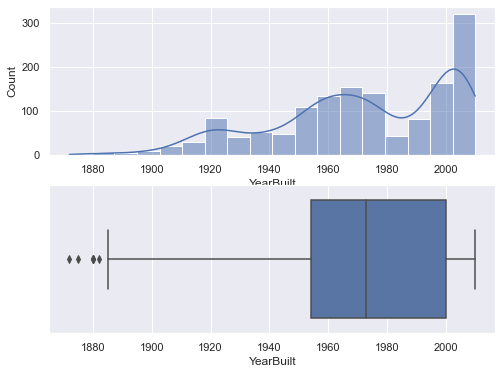

<Figure size 576x432 with 0 Axes>

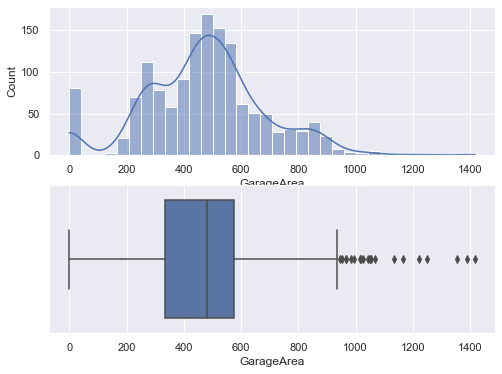

<Figure size 576x432 with 0 Axes>

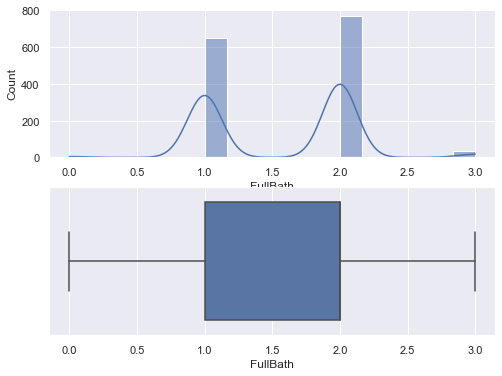

<Figure size 576x432 with 0 Axes>

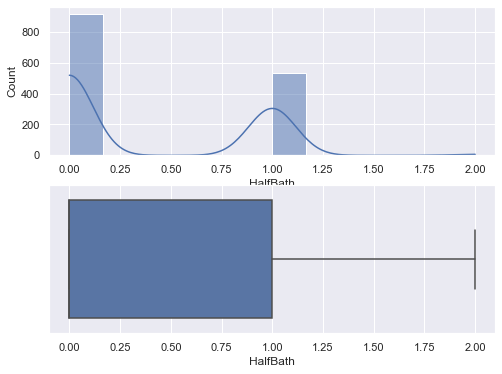

<Figure size 576x432 with 0 Axes>

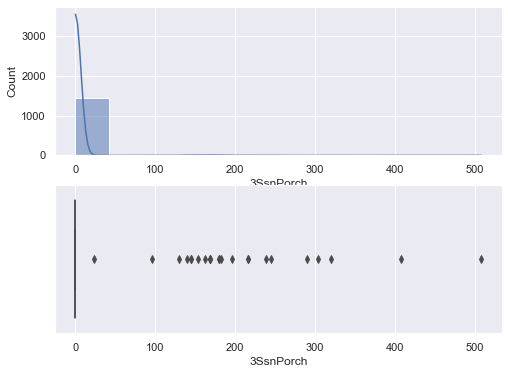

<Figure size 576x432 with 0 Axes>

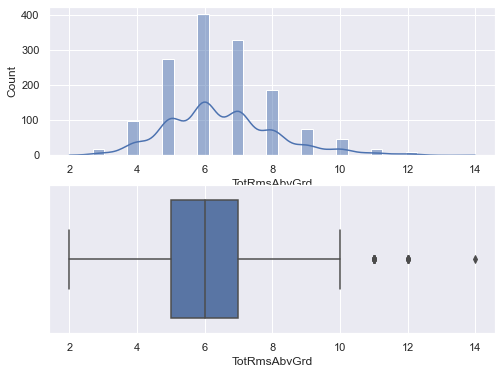

<Figure size 576x432 with 0 Axes>

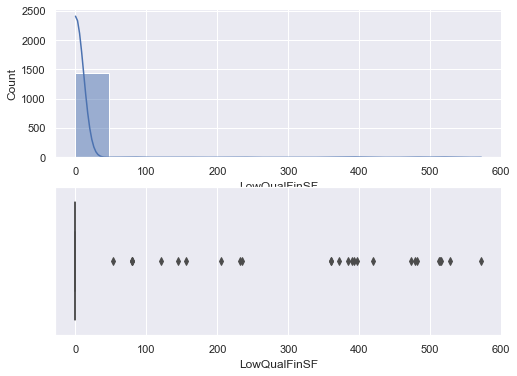

<Figure size 576x432 with 0 Axes>

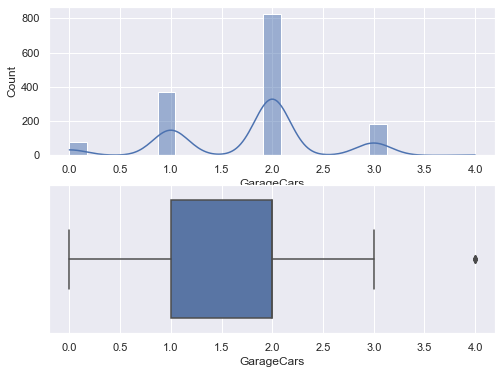

<Figure size 576x432 with 0 Axes>

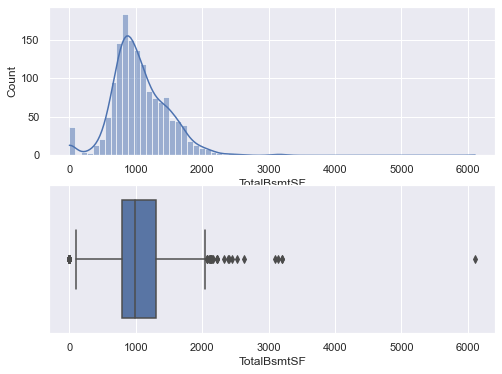

<Figure size 576x432 with 0 Axes>

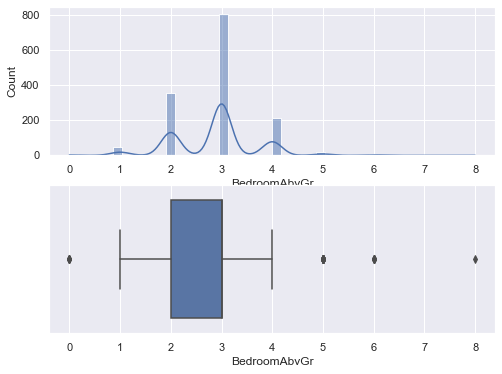

<Figure size 576x432 with 0 Axes>

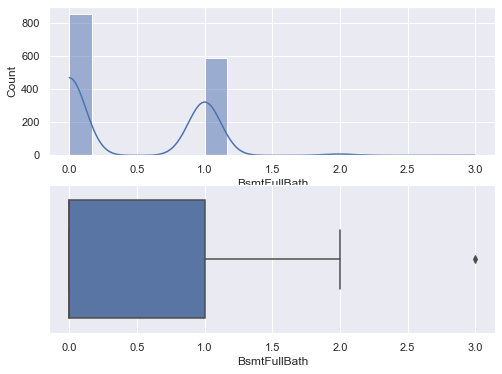

<Figure size 576x432 with 0 Axes>

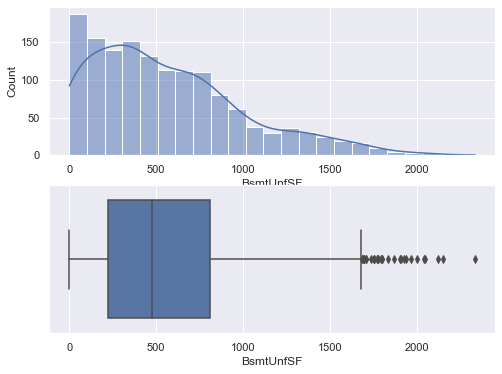

<Figure size 576x432 with 0 Axes>

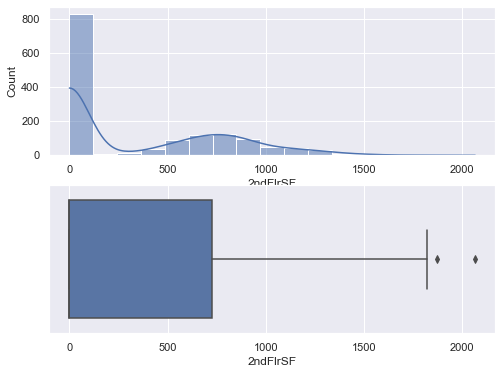

<Figure size 576x432 with 0 Axes>

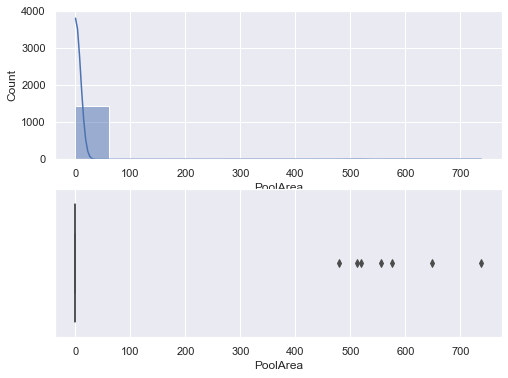

<Figure size 576x432 with 0 Axes>

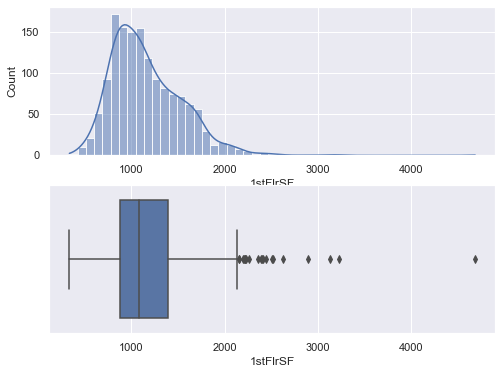

<Figure size 576x432 with 0 Axes>

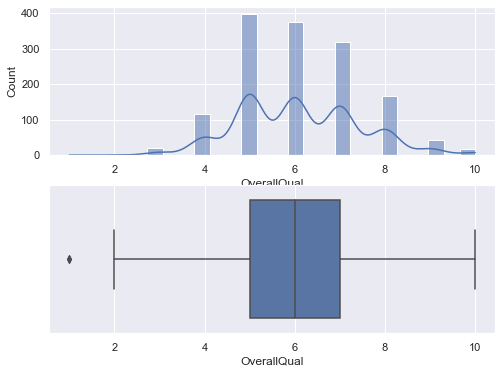

<Figure size 576x432 with 0 Axes>

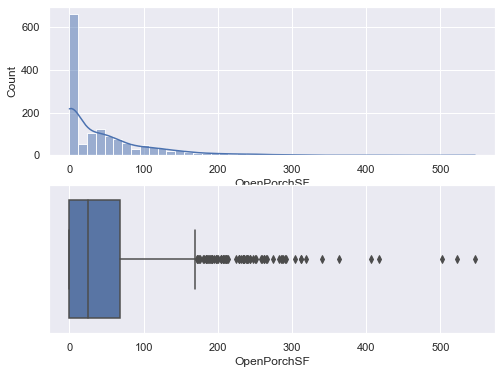

<Figure size 576x432 with 0 Axes>

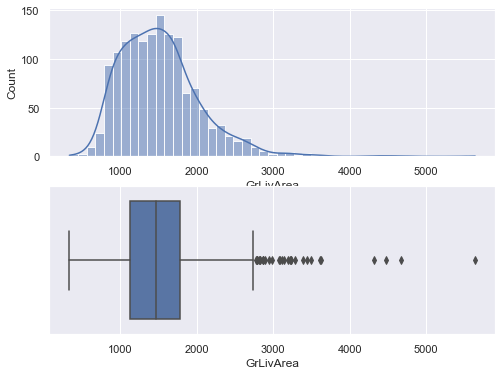

<Figure size 576x432 with 0 Axes>

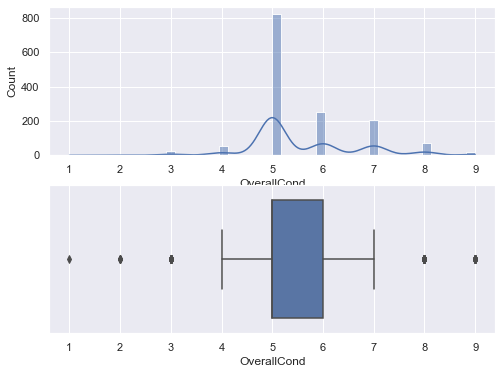

<Figure size 576x432 with 0 Axes>

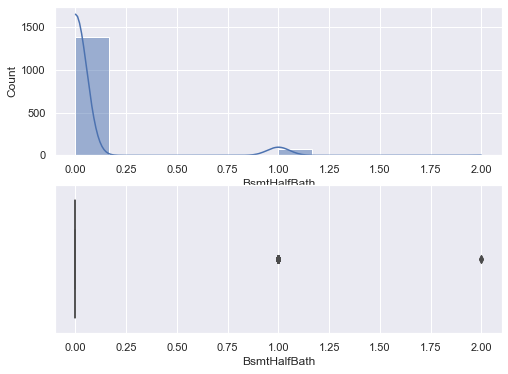

<Figure size 576x432 with 0 Axes>

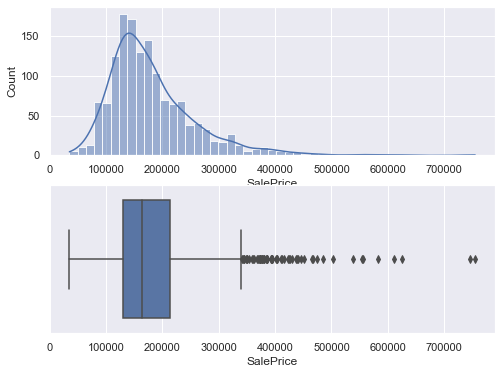

<Figure size 576x432 with 0 Axes>

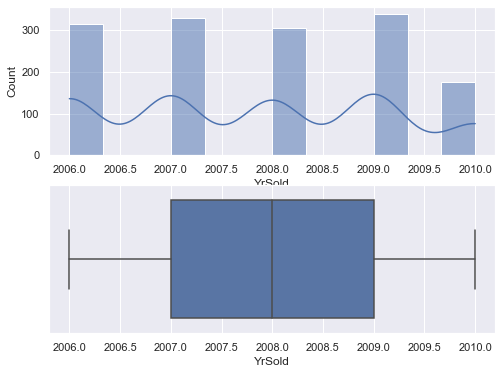

<Figure size 576x432 with 0 Axes>

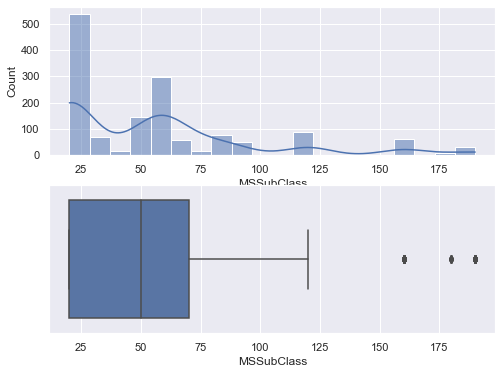

<Figure size 576x432 with 0 Axes>

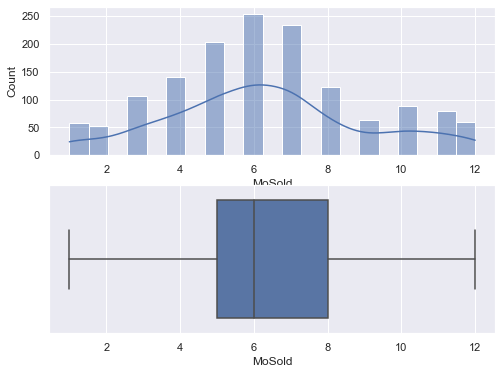

<Figure size 576x432 with 0 Axes>

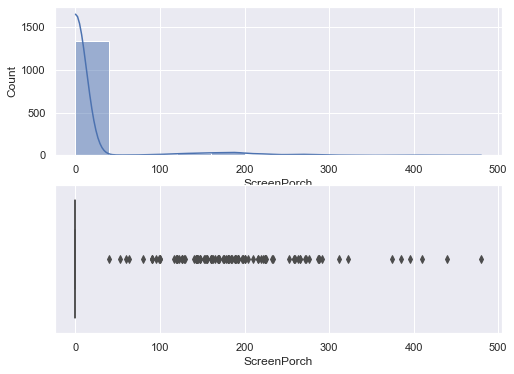

<Figure size 576x432 with 0 Axes>

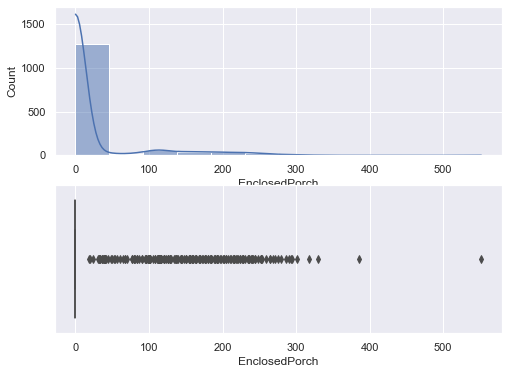

<Figure size 576x432 with 0 Axes>

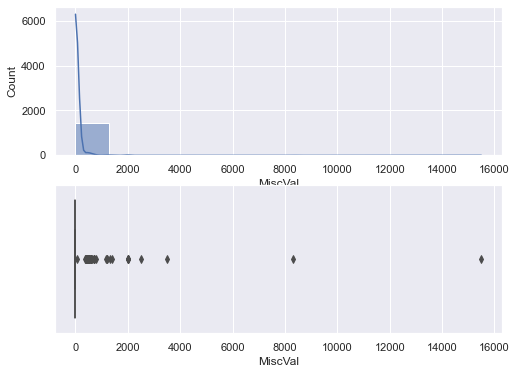

In [6]:
num_col_stats = []
for col in num_cols:
    stats = describe_num_col(df, col, return_result=True)
    num_col_stats.append(stats)
num_col_stats = pd.DataFrame(num_col_stats)
num_col_stats.set_index('Name', inplace=True)
num_col_stats.to_excel(writer, sheet_name="num_cols_stats")

## Corr for numerical

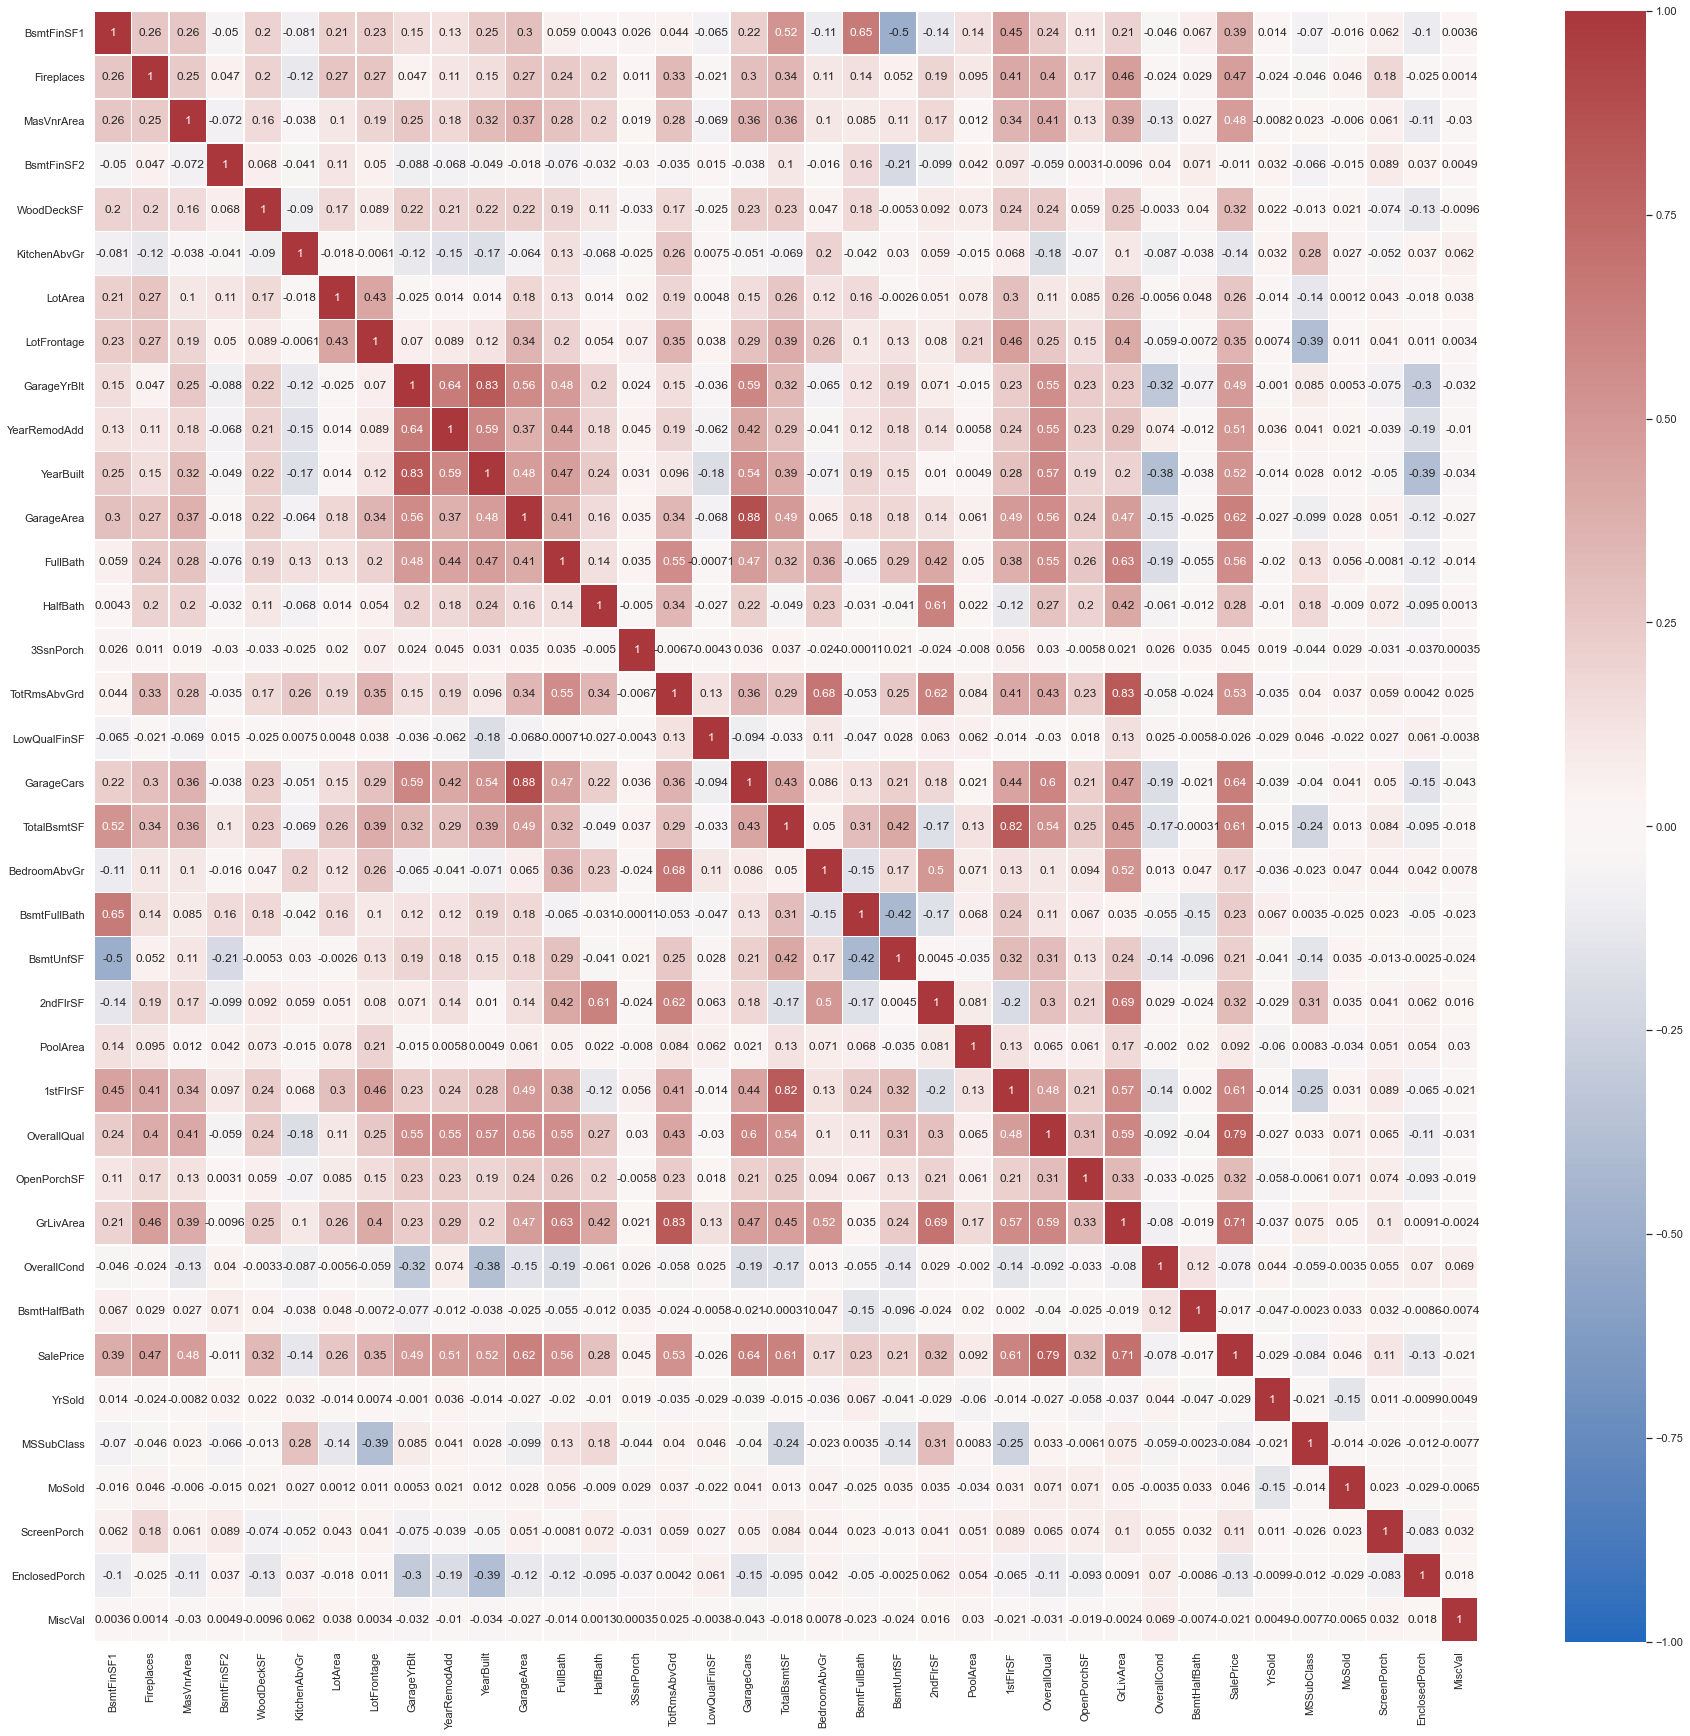

In [7]:
pairs, corr = correlation(df[list(num_cols)], k=5, plot_size=(31,30), file_name='corr.png')

In [8]:
corr.to_excel(writer, sheet_name="num_cols_corr")

In [9]:
pairs

[('GarageCars', 'GarageArea', 0.8824754142814603, 0.8824754142814603),
 ('YearBuilt', 'GarageYrBlt', 0.8256674841743434, 0.8256674841743434),
 ('GrLivArea', 'TotRmsAbvGrd', 0.8254893743088377, 0.8254893743088377),
 ('1stFlrSF', 'TotalBsmtSF', 0.8195299750050355, 0.8195299750050355),
 ('SalePrice', 'OverallQual', 0.7909816005838047, 0.7909816005838047)]

Pearson correlation:  0.8824754142814603
Pearson correlation:  0.8256674841743434
Pearson correlation:  0.8254893743088377
Pearson correlation:  0.8195299750050355
Pearson correlation:  0.7909816005838047


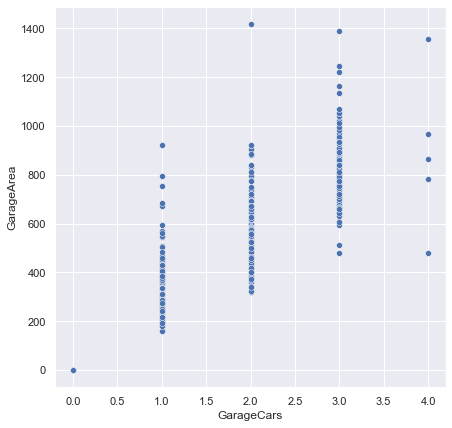

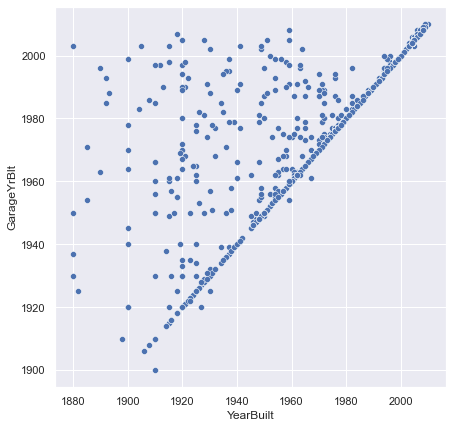

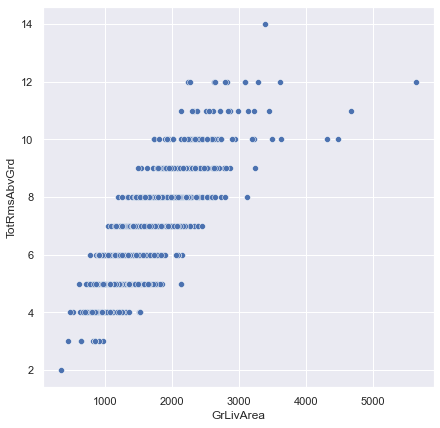

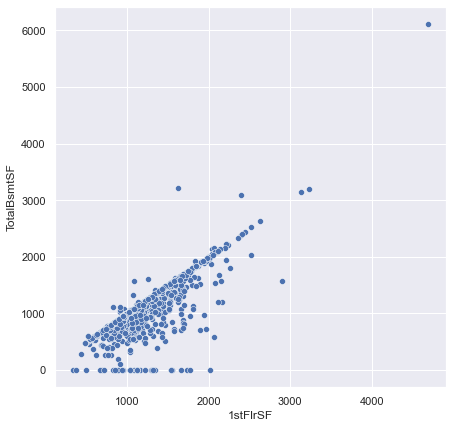

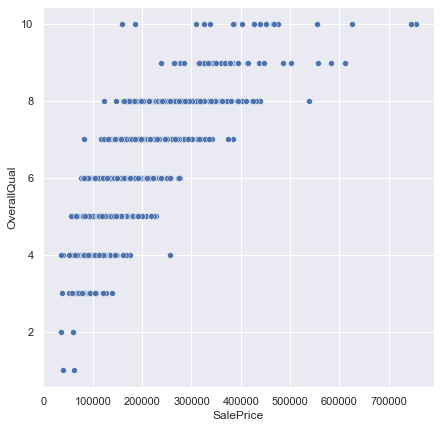

In [10]:
num_num_results = []
for col1,col2,_,_ in pairs:
    result = describe_num_num(df,col1,col2,return_result=True,
                              file_name='HIGHCORR_'+col1+'_'+col2+'.png', plot_size=(7,7))
    num_num_results.append(result)
num_num_results = pd.DataFrame(num_num_results)
num_num_results.to_excel(writer, sheet_name="high_corr_num_num")

## Missing Patterns

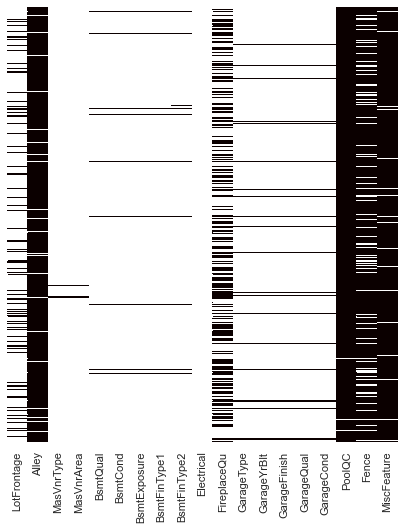

In [11]:
missing_pattern_df = missing_pattern(df,4,plot_size=(7,8),file_name='MISSING_PATTERN.png')

In [12]:
missing_pattern_df.to_excel(writer, sheet_name="missing_pattern")

## Target

-------------------------------------
Name: SalePrice
Type: int64
Rows: 1460
Min: 34900
Max: 755000
Mean: 180921.19589041095
Median: 163000.0
Mode: 140000
StdDev: 79442.50288288662
Distinct: 663
Sum: 264144946
Missing: 0
Missing%: 0.0
Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529
Outliers: 61
Outliers%: 0.04178082191780822
Q1: 129975.0
Q3: 214000.0
IQR: 84025.0
Down: 3937.5
Up: 340037.5
-------------------------------------
Shapiro-Wilk statistic:  0.869671642780304
Significance level: 0.05
p-value:  3.206247534576162e-33
<SalePrice is normally distributed> can be rejected.
-------------------------------------


<Figure size 504x576 with 0 Axes>

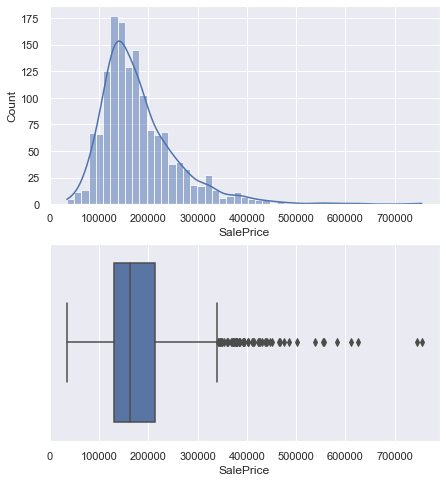

In [13]:
if target_col_is_num:
    target_stat = describe_num_col(df,target_col, file_name='TARGET_'+target_col+'.png', return_result=True)
else:
    target_stat = describe_cat_col(df,target_col, file_name='TARGET_'+target_col+'.png', return_result=True)

In [14]:
target_series = pd.Series(target_stat)
target_series.to_excel(writer, sheet_name="target")

## Best features


In [15]:
X = df[list(num_cols)+list(cat_cols)].copy()
X = auto_imputers(X)
X = general_encoder(X, num_cols=num_cols, ordinal_cols=cat_cols)
if target_col_is_num:
    X = tree_based_reg(X, df[target_col], n_keep=10)
else:
    X = tree_based_cls(X, df[target_col], n_keep=10)

In [16]:
important_features = X.columns.tolist()

-------------------------------------
Name: YrSold
Type: int64
Rows: 1460
Min: 2006
Max: 2010
Mean: 2007.8157534246575
Median: 2008.0
Mode: 2009
StdDev: 1.3280951205521099
Distinct: 5
Sum: 2931411
Missing: 0
Missing%: 0.0
Skewness: 0.09626851386568028
Kurtosis: -1.1906005711948109
Outliers: 0
Outliers%: 0.0
Q1: 2007.0
Q3: 2009.0
IQR: 2.0
Down: 2004.0
Up: 2012.0
-------------------------------------
Shapiro-Wilk statistic:  0.8970962762832642
Significance level: 0.05
p-value:  3.4190127761463244e-30
<YrSold is normally distributed> can be rejected.
-------------------------------------
-------------------------------------
Name: YearRemodAdd
Type: int64
Rows: 1460
Min: 1950
Max: 2010
Mean: 1984.8657534246574
Median: 1994.0
Mode: 1950
StdDev: 20.645406807709413
Distinct: 61
Sum: 2897904
Missing: 0
Missing%: 0.0
Skewness: -0.5035620027004709
Kurtosis: -1.2722451924732956
Outliers: 0
Outliers%: 0.0
Q1: 1967.0
Q3: 2004.0
IQR: 37.0
Down: 1911.5
Up: 2059.5
------------------------------------

<Figure size 504x576 with 0 Axes>

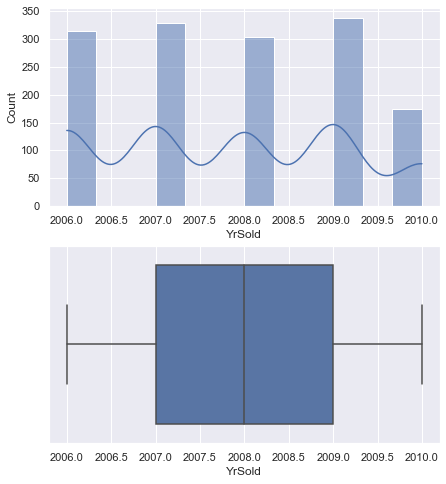

<Figure size 504x576 with 0 Axes>

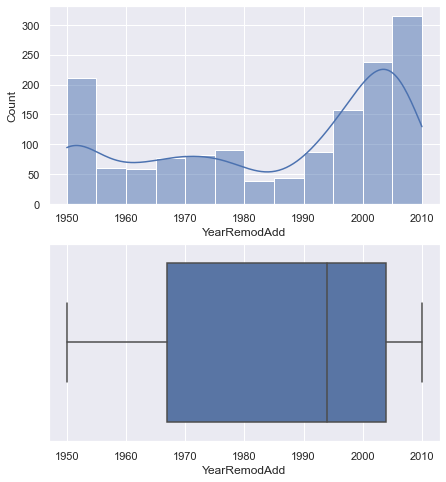

<Figure size 504x576 with 0 Axes>

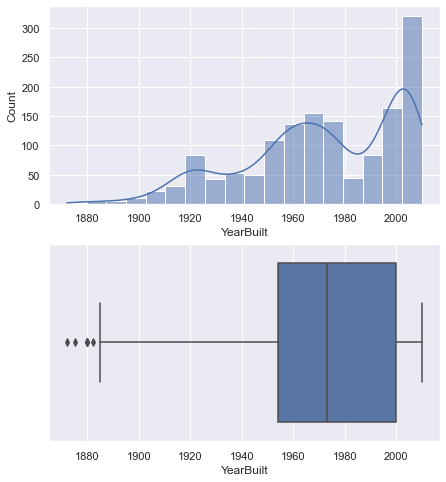

<Figure size 504x576 with 0 Axes>

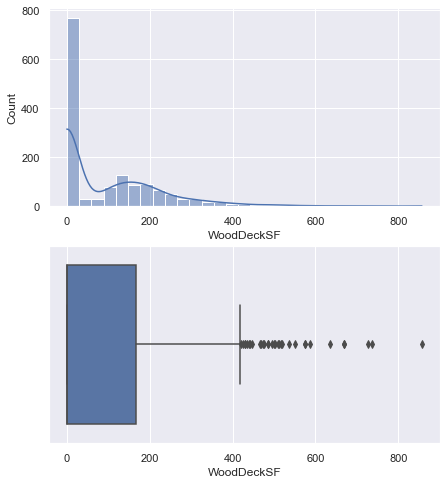

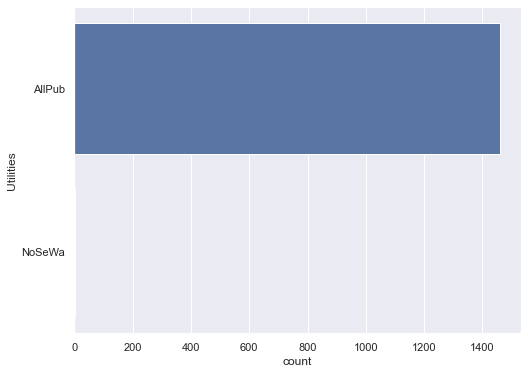

<Figure size 576x432 with 0 Axes>

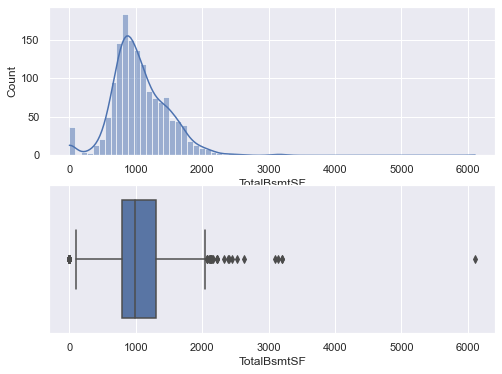

<Figure size 576x432 with 0 Axes>

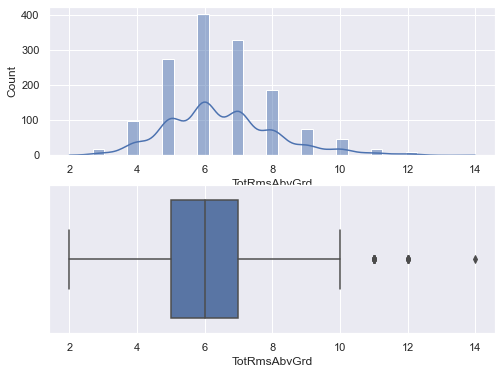

In [17]:
for feature in important_features:
    if feature in num_cols:
        describe_num_col(df, feature, file_name='IMP_FEAT_'+feature+'.png')
    if feature in cat_cols:
        describe_cat_col(df, feature, file_name='IMP_FEAT_'+feature+'.png')

Pearson correlation:  -0.028922585168730426
Pearson correlation:  0.5071009671113867
Pearson correlation:  0.5228973328794967
Pearson correlation:  0.32441344456813076
Pearson correlation:  0.6135805515591944
Pearson correlation:  0.5337231555820238


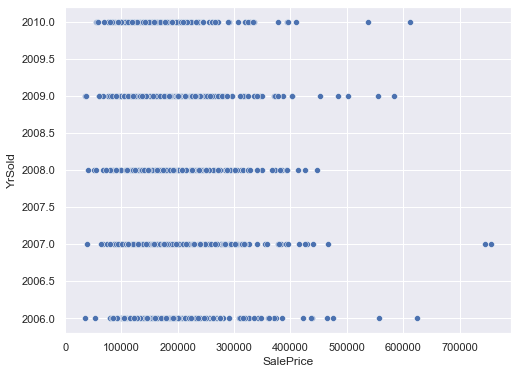

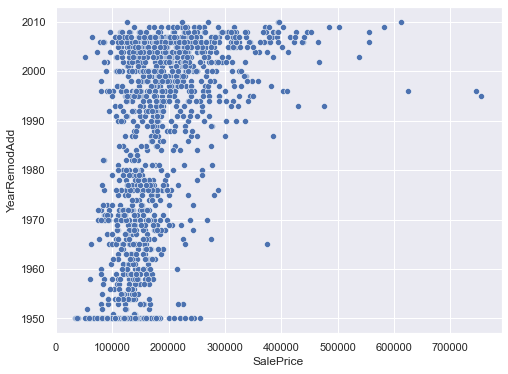

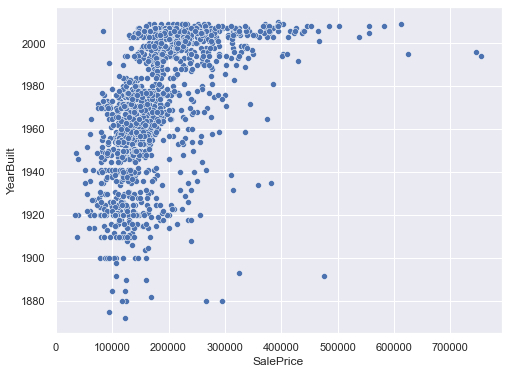

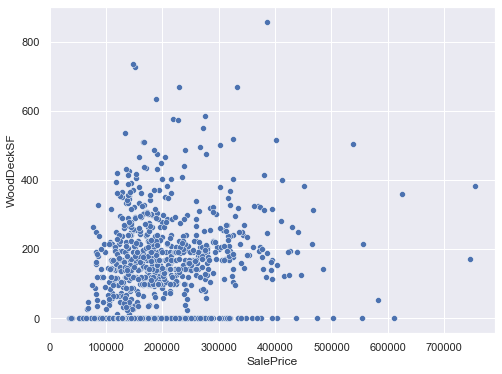

<Figure size 576x432 with 0 Axes>

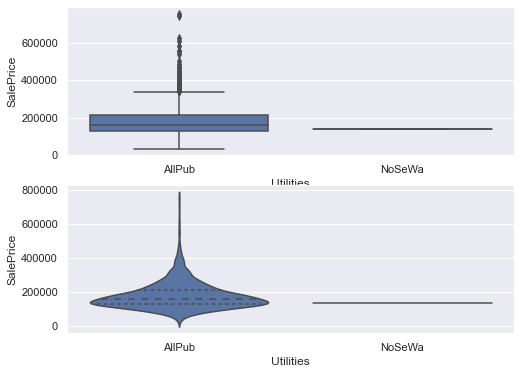

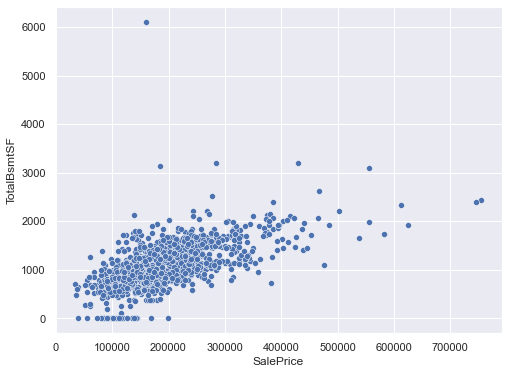

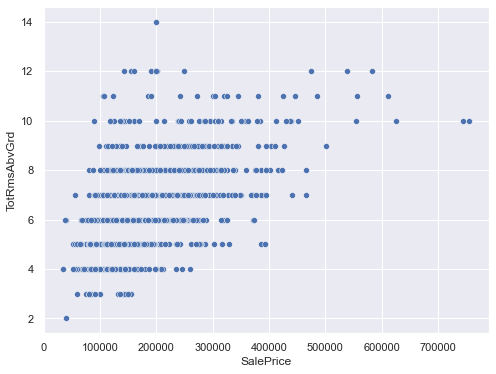

In [18]:
if target_col_is_num:
    for feature in important_features:
        if feature in num_cols:
            describe_num_num(df, num_col1=target_col, num_col2=feature,
                             file_name='TGTFEAT_'+feature+'.png')
        if feature in cat_cols:
            describe_cat_num(df, cat_col=feature, num_col=target_col,
                             file_name='TGTFEAT_'+feature+'.png')
else:
   for feature in important_features:
        if feature in num_cols:
            describe_cat_num(df, cat_col=target_col, num_col=feature,
                             file_name='TGTFEAT_'+feature+'.png')
        if feature in cat_cols:
            describe_cat_cat(df, cat_col1=target_col, cat_col2=feature,
                             file_name='TGTFEAT_'+feature+'.png')

In [19]:
writer.save()
writer.close()

/Users/FY/opt/anaconda3/envs/py36/lib/python3.6/site-packages/xlsxwriter/workbook.py:329: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
